In [1]:
# Tried to load data in sql but their was an error we'll try again

In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading dataset for EDA

In [3]:
studmarks = pd.read_csv('Student_Marks.csv')
studmarks.head()

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [4]:
studmarks.tail()

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [5]:
studmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   Gender      10 non-null     object
 2   DOB         10 non-null     object
 3   Maths       10 non-null     int64 
 4   Physics     10 non-null     int64 
 5   Chemistry   10 non-null     int64 
 6   English     10 non-null     int64 
 7   Biology     10 non-null     int64 
 8   Economics   10 non-null     int64 
 9   History     10 non-null     int64 
 10  Civics      10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [6]:
studmarks.shape

(10, 11)

# Working on cleansing of data

In [7]:
# As we see that there is a column name Unnamed we'll rename it
studmarks.rename(columns={'Unnamed: 0':'Name'}, inplace=True)

In [8]:
studmarks.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

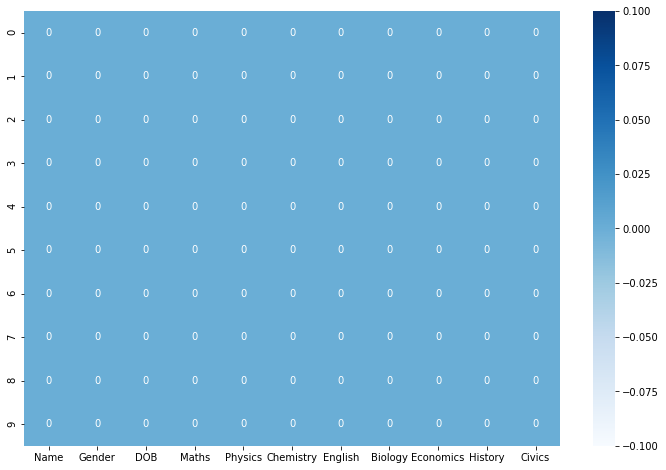

In [9]:
# Checking wheather there are any null values present using heatmap

plt.figure(figsize=(12,8))
sns.heatmap(studmarks.isnull(),cmap="Blues",annot=True)
plt.show()
# data has no null value

In [10]:
# Checking the null value without using visualization
studmarks.isnull().sum()
# No null value is reflecting in the dataset

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

# Summary Statistics

In [11]:
studmarks.describe()
# we see that there is a difference between mean and 50% percentile in most of the columns
# we also see that 75% percentile and max got large difference in almost all columns
# both the observation shows that there can be extreme outliers present in the columns

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200E8348988>,
      dtype=object)

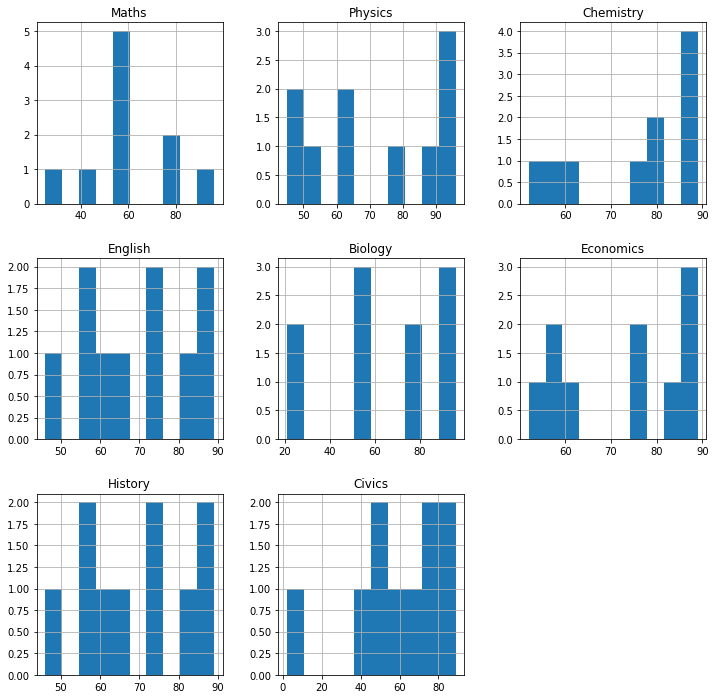

In [12]:
# Representation of dataset in histogram
studmarks.hist(figsize=(12,12))

In [13]:
#Installing and importing important libraries for graphical representation of data
!pip install plotly==3.10 
import plotly.plotly as po
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [14]:
df = studmarks
data = df.loc[:,['Gender', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics']]
data["index"] = np.arange(1, len(data) +1)

figure = ff.create_scatterplotmatrix(data, diag = 'box', index = 'index', colormap = 'Portland',
                                    colormap_type = 'cat', height = 800, width = 800)
iplot(figure)

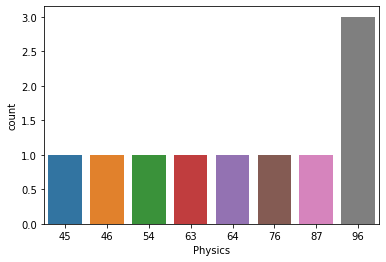

In [15]:
# displaying data on marks
sns.countplot(x ='Physics', data = studmarks)

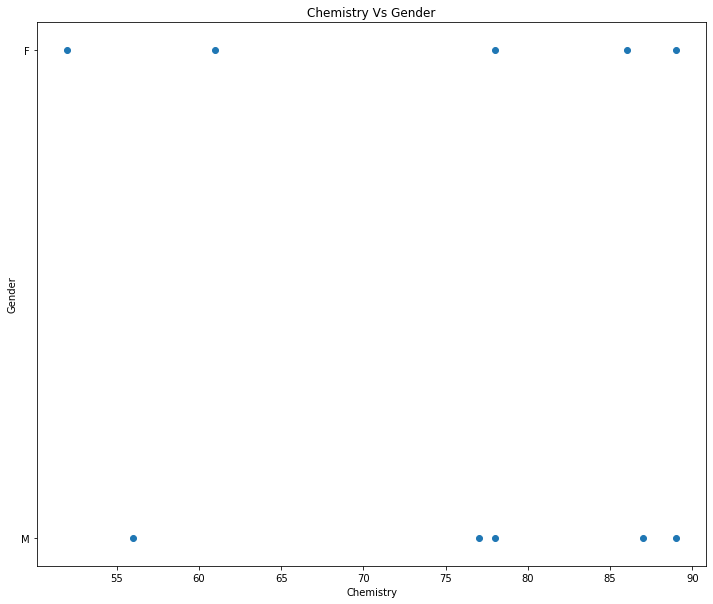

In [16]:
plt.figure(figsize = (12,10))
plt.scatter(studmarks['Chemistry'],studmarks['Gender'])
plt.title("Chemistry Vs Gender")
plt.xlabel("Chemistry")
plt.ylabel("Gender")
plt.show()

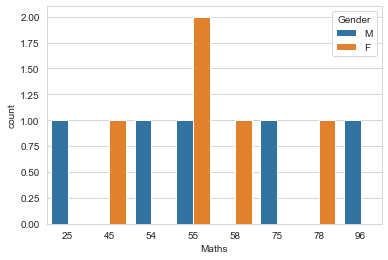

In [17]:
sns.set_style('whitegrid')
sns.countplot(x = 'Maths', hue = 'Gender', data= studmarks)

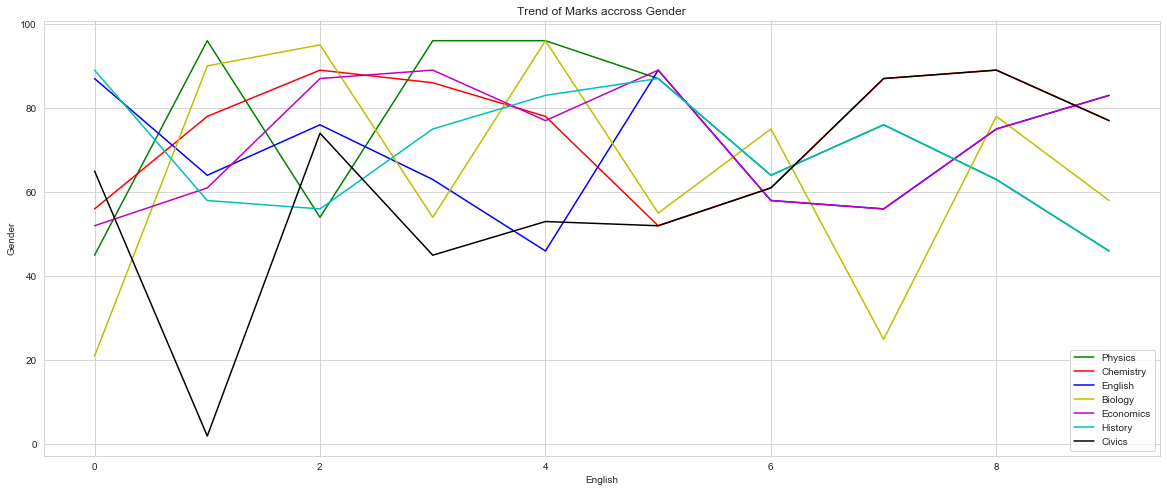

In [18]:
gender_wise = studmarks[['Gender','Physics', 'Chemistry','English','Biology', 'Economics', 'History', 'Civics']]
gender_wise.plot(kind = 'line',figsize = (20,8),color="g""r""b""y""m""c""k""w")
plt.title("Trend of Marks accross Gender")
plt.xlabel("English")
plt.ylabel("Gender")
plt.show()

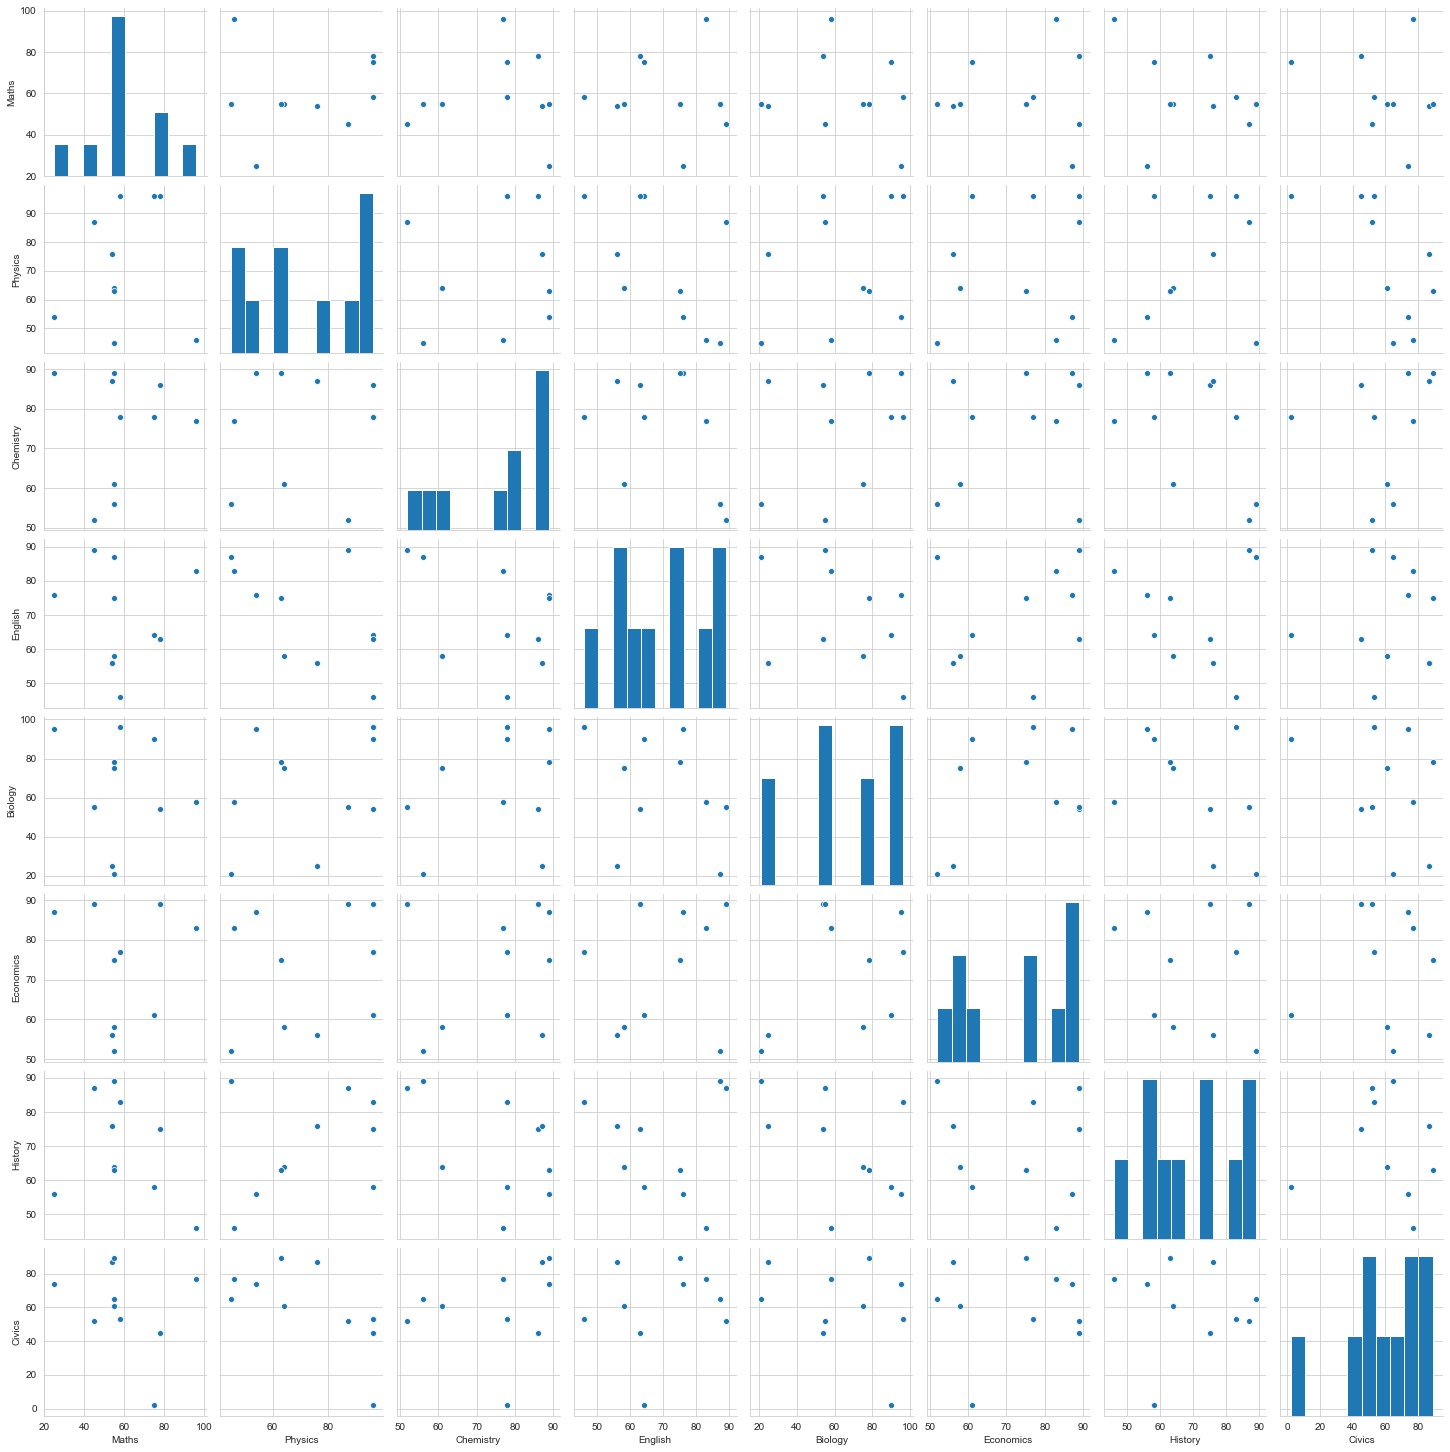

In [19]:
# Bivariate Analysis
sns.pairplot(studmarks)

In [20]:
studmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [21]:
# Importing Label Encoder to convert object to numeric dtypes
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

labelencoder_studmarks = studmarks
labelencoder_studmarks['Gender'] = label_encoder.fit_transform(labelencoder_studmarks['Gender'])

In [22]:
# dropping columns as we do not intend to use at this point
labelencoder_studmarks.drop(['Name','DOB'], inplace = True, axis =1)

In [23]:
labelencoder_studmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Gender     10 non-null     int32
 1   Maths      10 non-null     int64
 2   Physics    10 non-null     int64
 3   Chemistry  10 non-null     int64
 4   English    10 non-null     int64
 5   Biology    10 non-null     int64
 6   Economics  10 non-null     int64
 7   History    10 non-null     int64
 8   Civics     10 non-null     int64
dtypes: int32(1), int64(8)
memory usage: 808.0 bytes


# Checking Correlation

In [24]:
dfcor=studmarks.corr()
dfcor

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Gender,1.000000,0.075832,-0.454052,0.158109,0.255257,-0.269398,-0.353067,-0.342774,0.020796
Maths,0.075832,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,-0.454052,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.158109,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,0.255257,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.269398,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,-0.353067,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.342774,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,0.020796,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


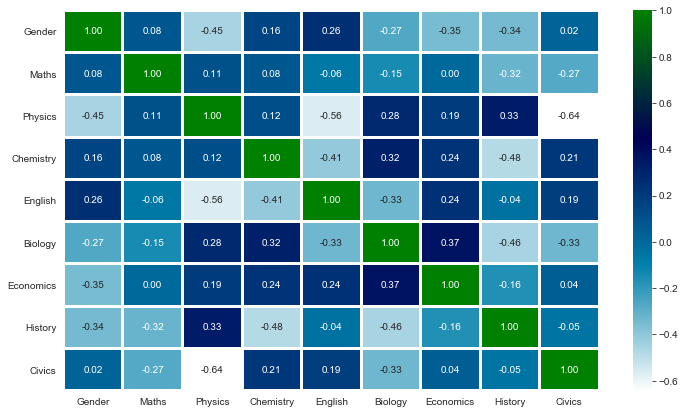

In [25]:
# Generating Heatmap to check the correlation among the features
plt.figure(figsize=(12,7))
sns.heatmap(dfcor, cmap ='ocean_r', linewidths =2, fmt =".2f", annot = True)
# darker colour represent positive correlation whereas lighter colour represent negative correlation

# Plotting Outliers

In [26]:
df_studmarks = labelencoder_studmarks

In [27]:
# Lets check whether there are outliner present in the dataset 

from scipy.stats import zscore
z_score=abs(zscore(df_studmarks))
print(df_studmarks.shape)
studmarks_df = df_studmarks.loc[(z_score<3).all(axis=1)]
print(studmarks_df.shape)
# thre are no outliner present

(10, 9)
(10, 9)


# Ckecking if skewness is present

In [28]:
studmarks_df.skew()
# Chemistry and civics reflect above normal negative skewness

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

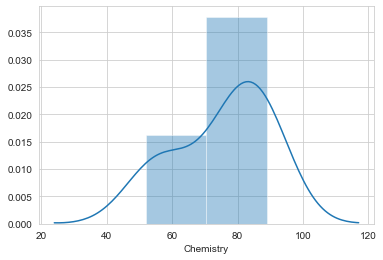

In [29]:
# Graphical representation of Skewness
sns.distplot(studmarks_df['Chemistry'])

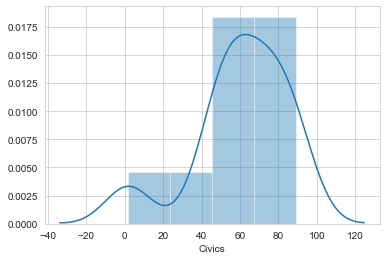

In [30]:
# Graphical representation of skewness
sns.distplot(studmarks_df['Civics'])

In [31]:
# Treating Skewness with log
import numpy as np
for col in studmarks_df.columns:
    if studmarks_df.skew().loc[col]>0.55:
        studmarks_df[col]=np.log1p(studmarks_df[col])
        
studmarks_df.skew()
        

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [32]:
# skewness still present, hence treating with square root transform

list =['Gender','Maths', 'Physics', 'Chemistry', 'English','Biology', 'Economics', 'History', 
       'Civics']
for i in list:
    studmarks_df[i]=np.sqrt(np.sqrt(studmarks_df[i]))
    
studmarks_df.skew()

Gender       0.000000
Maths       -0.678263
Physics     -0.229791
Chemistry   -0.859434
English     -0.363196
Biology     -0.990516
Economics   -0.340842
History     -0.363196
Civics      -2.671509
dtype: float64

In [33]:
# Seperating input and output variables
# defining x and y variables
x=studmarks_df.iloc[:,1:]
x.head(3)

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,2.723270,2.590020,2.735565,3.054076,2.140695,2.685350,3.071479,2.839412
1,2.942831,3.130169,2.971828,2.828427,3.080070,2.794682,2.759669,1.189207
2,2.236068,2.710806,3.071479,2.952592,3.121986,3.054076,2.735565,2.932972


In [35]:
# defining y Variable
y = studmarks_df.iloc[:,:1]
y.head(3)

,Gender
0,1.0
1,1.0
2,1.0


In [36]:
x.shape

(10, 8)

In [37]:
y.shape

(10, 1)

In [38]:
# Data is ready for machine learning